## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Preprocessing

In [2]:
dataset = pd.read_csv('weatherAUS.csv')
dataset = dataset.dropna(axis = 'index',subset = ['RainTomorrow'])
dataset = dataset.dropna(axis = 'index', subset = ['RainToday'])

In [3]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X[:, [1,2,3,4,5,7,10,11,12,13,14,15,16,17,18,19]])
X[:, [1,2,3,4,5,7,10,11,12,13,14,15,16,17,18,19]] = imputer.transform(X[:, [1,2,3,4,5,7,10,11,12,13,14,15,16,17,18,19]])

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
ct2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-12,-13,-15])], remainder='passthrough')

X = np.array(ct1.fit_transform(X))
X = np.array(ct2.fit_transform(X))

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, -1] = np.array(le.fit_transform(X[:, -1]))
y = np.array(le.fit_transform(y))

## Finding optimal number of clusters using elbow method

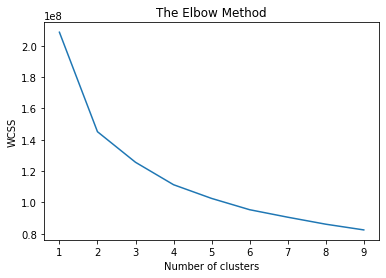

In [6]:
from sklearn.cluster import KMeans
wcss= []

for i in range (1,10):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the model

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Finding the centers

In [8]:
cc = kmeans.cluster_centers_
for i in range(4):
    print(f"Center{i+1}: ({round(cc[i, 0],4)},{round(cc[i, 1],4)})")
    #print(f"Center{i+1}: ({cc[i, 0]},{cc[i, 1]})")

Center1: (0.0664,0.0708)
Center2: (0.0579,0.0451)
Center3: (0.0426,0.0369)
Center4: (0.061,0.0495)


## Visualization

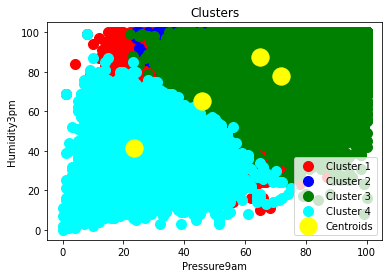

In [9]:
a,b = -8,-9
plt.scatter(X[y_kmeans == 0, a], X[y_kmeans == 0, b], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, a], X[y_kmeans == 1, b], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, a], X[y_kmeans == 2, b], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, a], X[y_kmeans == 3, b], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, a], kmeans.cluster_centers_[:, b], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Pressure9am')
plt.ylabel('Humidity3pm')
plt.legend()
plt.show()